<a href="https://colab.research.google.com/github/gulIbrahimi/Rainfall_Prediction_ML_Project/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


The size of the dataset:

In [6]:
df.shape

(366, 12)

Checking which column of the dataset contains which datatype:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


As per the above information regarding the data in each column, we can observe that there are no null values.

In [8]:
df.describe().T # no null vals

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


## Data Cleaning
The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or do some modeling on it. Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any sort in the data inputs.

In [9]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


So there is one null value in the 'winddirection' as well as the 'windspeed' column. But what's up with the column name wind direction?

In [10]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

There are unnecessary spaces in the names of the columns, we can remove it:

In [11]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

## Exploratory Data Analysis
Here, we'll explore how to identify data imbalance and skewness.Here we will see how to check the data imbalance and skewness of the data.

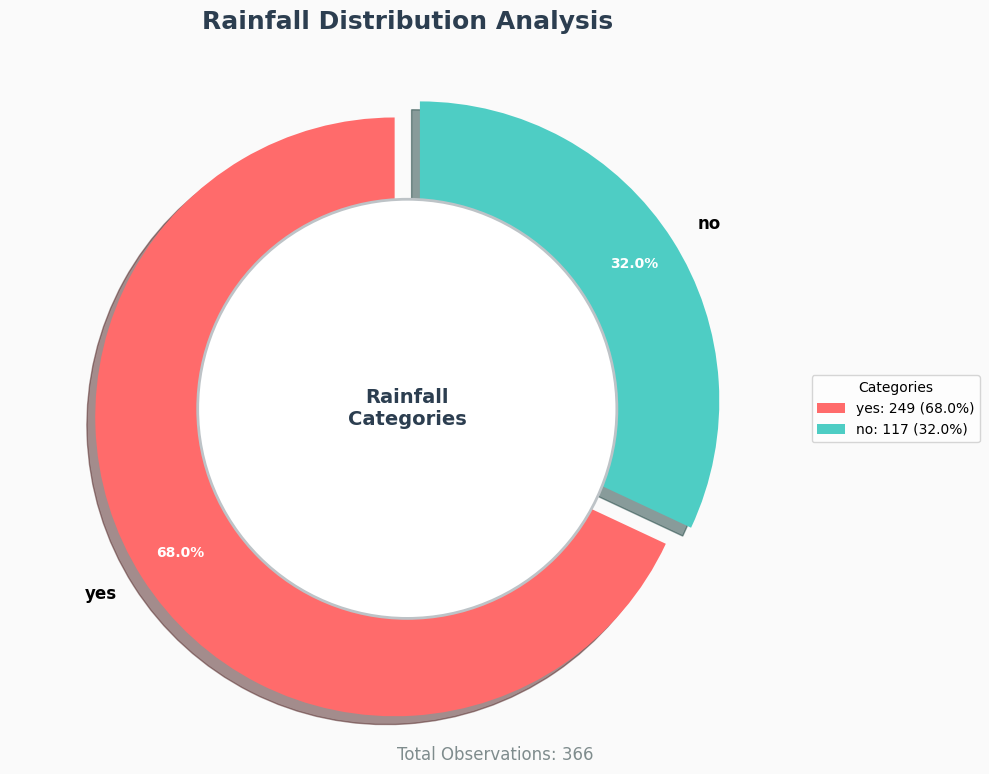

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure with better styling
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 8))

# Get data
values = df['rainfall'].value_counts().values
labels = df['rainfall'].value_counts().index

# Create a modern color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']
colors = colors[:len(labels)]  # Use only as many colors as needed

# Create the pie chart with enhanced styling
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,           # Start from top
    explode=[0.05] * len(labels),  # Slightly separate all slices
    shadow=True,             # Add shadow for depth
    textprops={'fontsize': 11, 'fontweight': 'bold'},
    pctdistance=0.85         # Distance of percentage labels from center
)

# Customize the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Customize label text
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Add a beautiful title
plt.title('Rainfall Distribution Analysis',
          fontsize=18,
          fontweight='bold',
          pad=30,
          color='#2C3E50')

# Add a subtitle with total count
total_count = sum(values)
plt.suptitle(f'Total Observations: {total_count:,}',
             fontsize=12,
             y=0.02,
             color='#7F8C8D')

# Create a circle at the center for a donut chart effect (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white', linewidth=2, edgecolor='#BDC3C7')
fig.gca().add_artist(centre_circle)

# Add center text
ax.text(0, 0, 'Rainfall\nCategories',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14,
        fontweight='bold',
        color='#2C3E50')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend with better positioning
ax.legend(wedges, [f'{label}: {value} ({value/total_count*100:.1f}%)'
                   for label, value in zip(labels, values)],
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

# Adjust layout to accommodate legend
plt.tight_layout()

# Optional: Add a subtle background color to the figure
fig.patch.set_facecolor('#FAFAFA')

plt.show()

# Optional: Save the figure in high quality
# plt.savefig('rainfall_distribution.png', dpi=300, bbox_inches='tight',
#             facecolor='#FAFAFA', edgecolor='none')

In [15]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


Here we can clearly draw some observations:

- maxtemp is relatively lower on days of rainfall.
- dewpoint value is higher on days of rainfall.
- humidity is high on the days when rainfall is expected.
- Obviously, clouds must be there for rainfall.
- sunshine is also less on days of rainfall.
- windspeed is higher on days of rainfall.


In [16]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


Let's check the distribution of the continuous features given in the dataset.

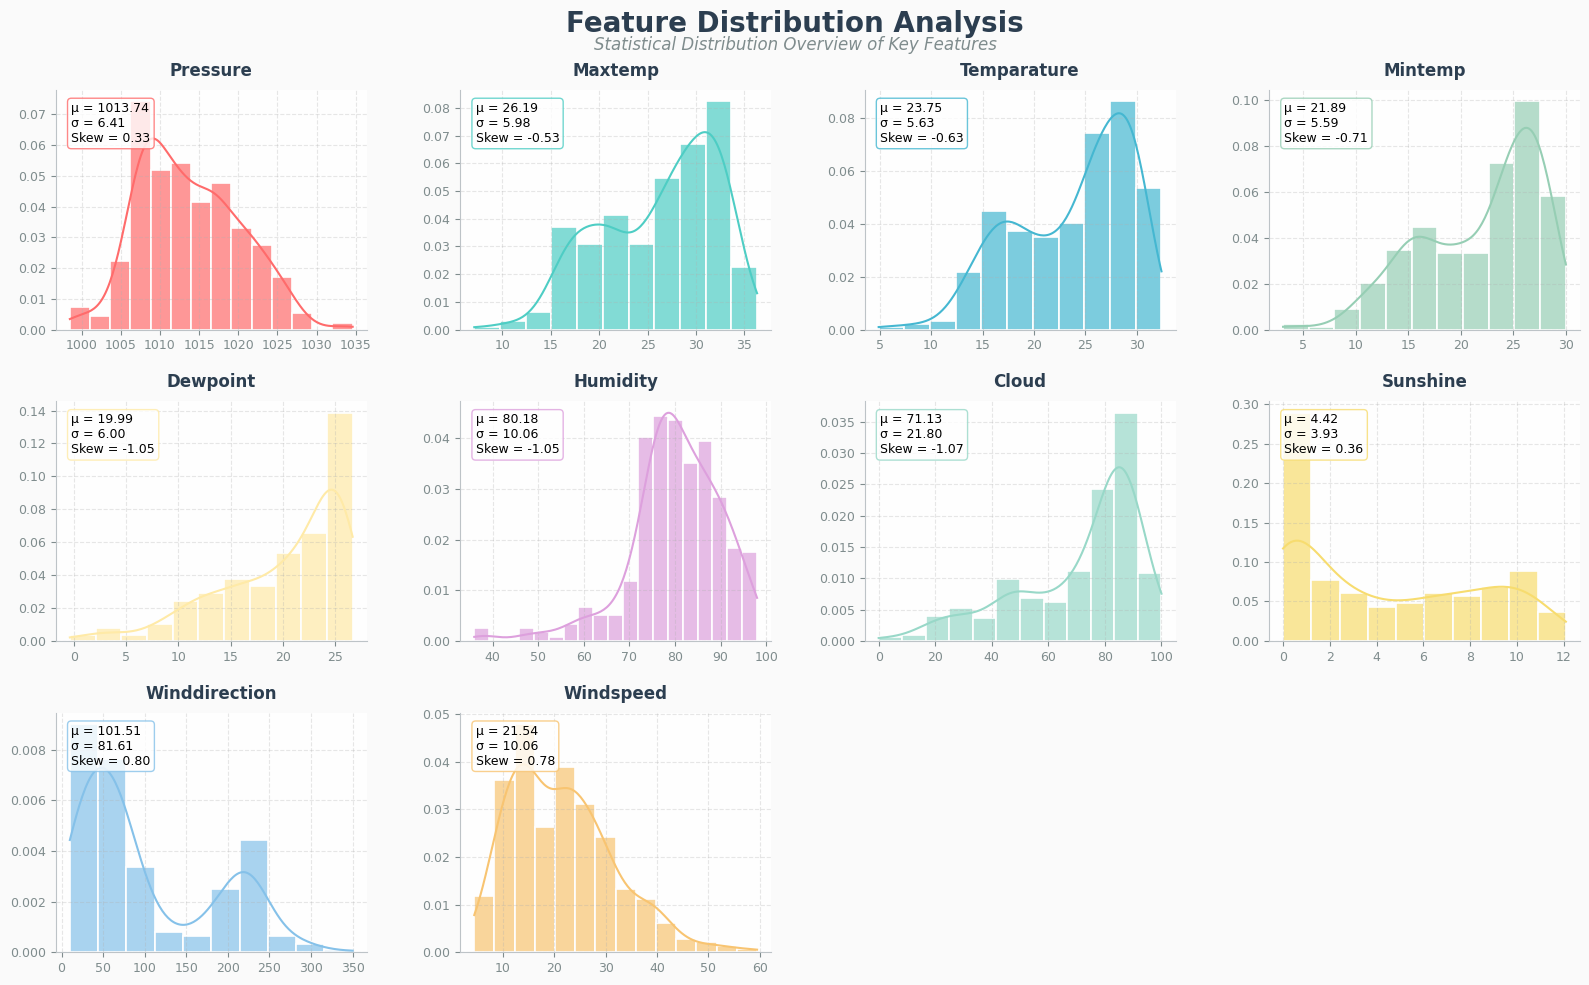

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set modern styling
plt.style.use('default')
sns.set_palette("husl")  # Beautiful color palette

# Create figure with enhanced styling
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=4)
fig.suptitle('Feature Distribution Analysis',
             fontsize=20,
             fontweight='bold',
             y=0.98,
             color='#2C3E50')

# Add subtitle
fig.text(0.5, 0.94, 'Statistical Distribution Overview of Key Features',
         ha='center', fontsize=12, style='italic', color='#7F8C8D')

# Set background color
fig.patch.set_facecolor('#FAFAFA')

# Modern color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4',
          '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F',
          '#85C1E9', '#F8C471', '#82E0AA', '#D7BDE2']

# Flatten axes for easy iteration
axes_flat = axes.flatten()

for i, col in enumerate(features):
    ax = axes_flat[i]

    # Create histogram with KDE
    sns.histplot(data=df, x=col,
                kde=True,
                ax=ax,
                color=colors[i % len(colors)],
                alpha=0.7,
                stat='density',
                edgecolor='white',
                linewidth=1.2)

    # Customize each subplot
    ax.set_title(f'{col.title().replace("_", " ")}',
                fontsize=12,
                fontweight='bold',
                pad=10,
                color='#2C3E50')

    ax.set_xlabel('')  # Remove x-label for cleaner look
    ax.set_ylabel('')  # Remove y-label for cleaner look

    # Add statistics text box
    mean_val = df[col].mean()
    std_val = df[col].std()
    skew_val = stats.skew(df[col].dropna())

    stats_text = f'μ = {mean_val:.2f}\nσ = {std_val:.2f}\nSkew = {skew_val:.2f}'

    # Position text box
    ax.text(0.05, 0.95, stats_text,
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor='white',
                     alpha=0.8,
                     edgecolor=colors[i % len(colors)],
                     linewidth=1))

    # Style the axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    ax.tick_params(colors='#7F8C8D', labelsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')

    # Add subtle background color to each subplot
    ax.set_facecolor('#FEFEFE')

# Hide empty subplots if features < 12
for j in range(len(features), len(axes_flat)):
    axes_flat[j].set_visible(False)

# Adjust layout with better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.3, wspace=0.3)

plt.show()


## Sample Dashboard

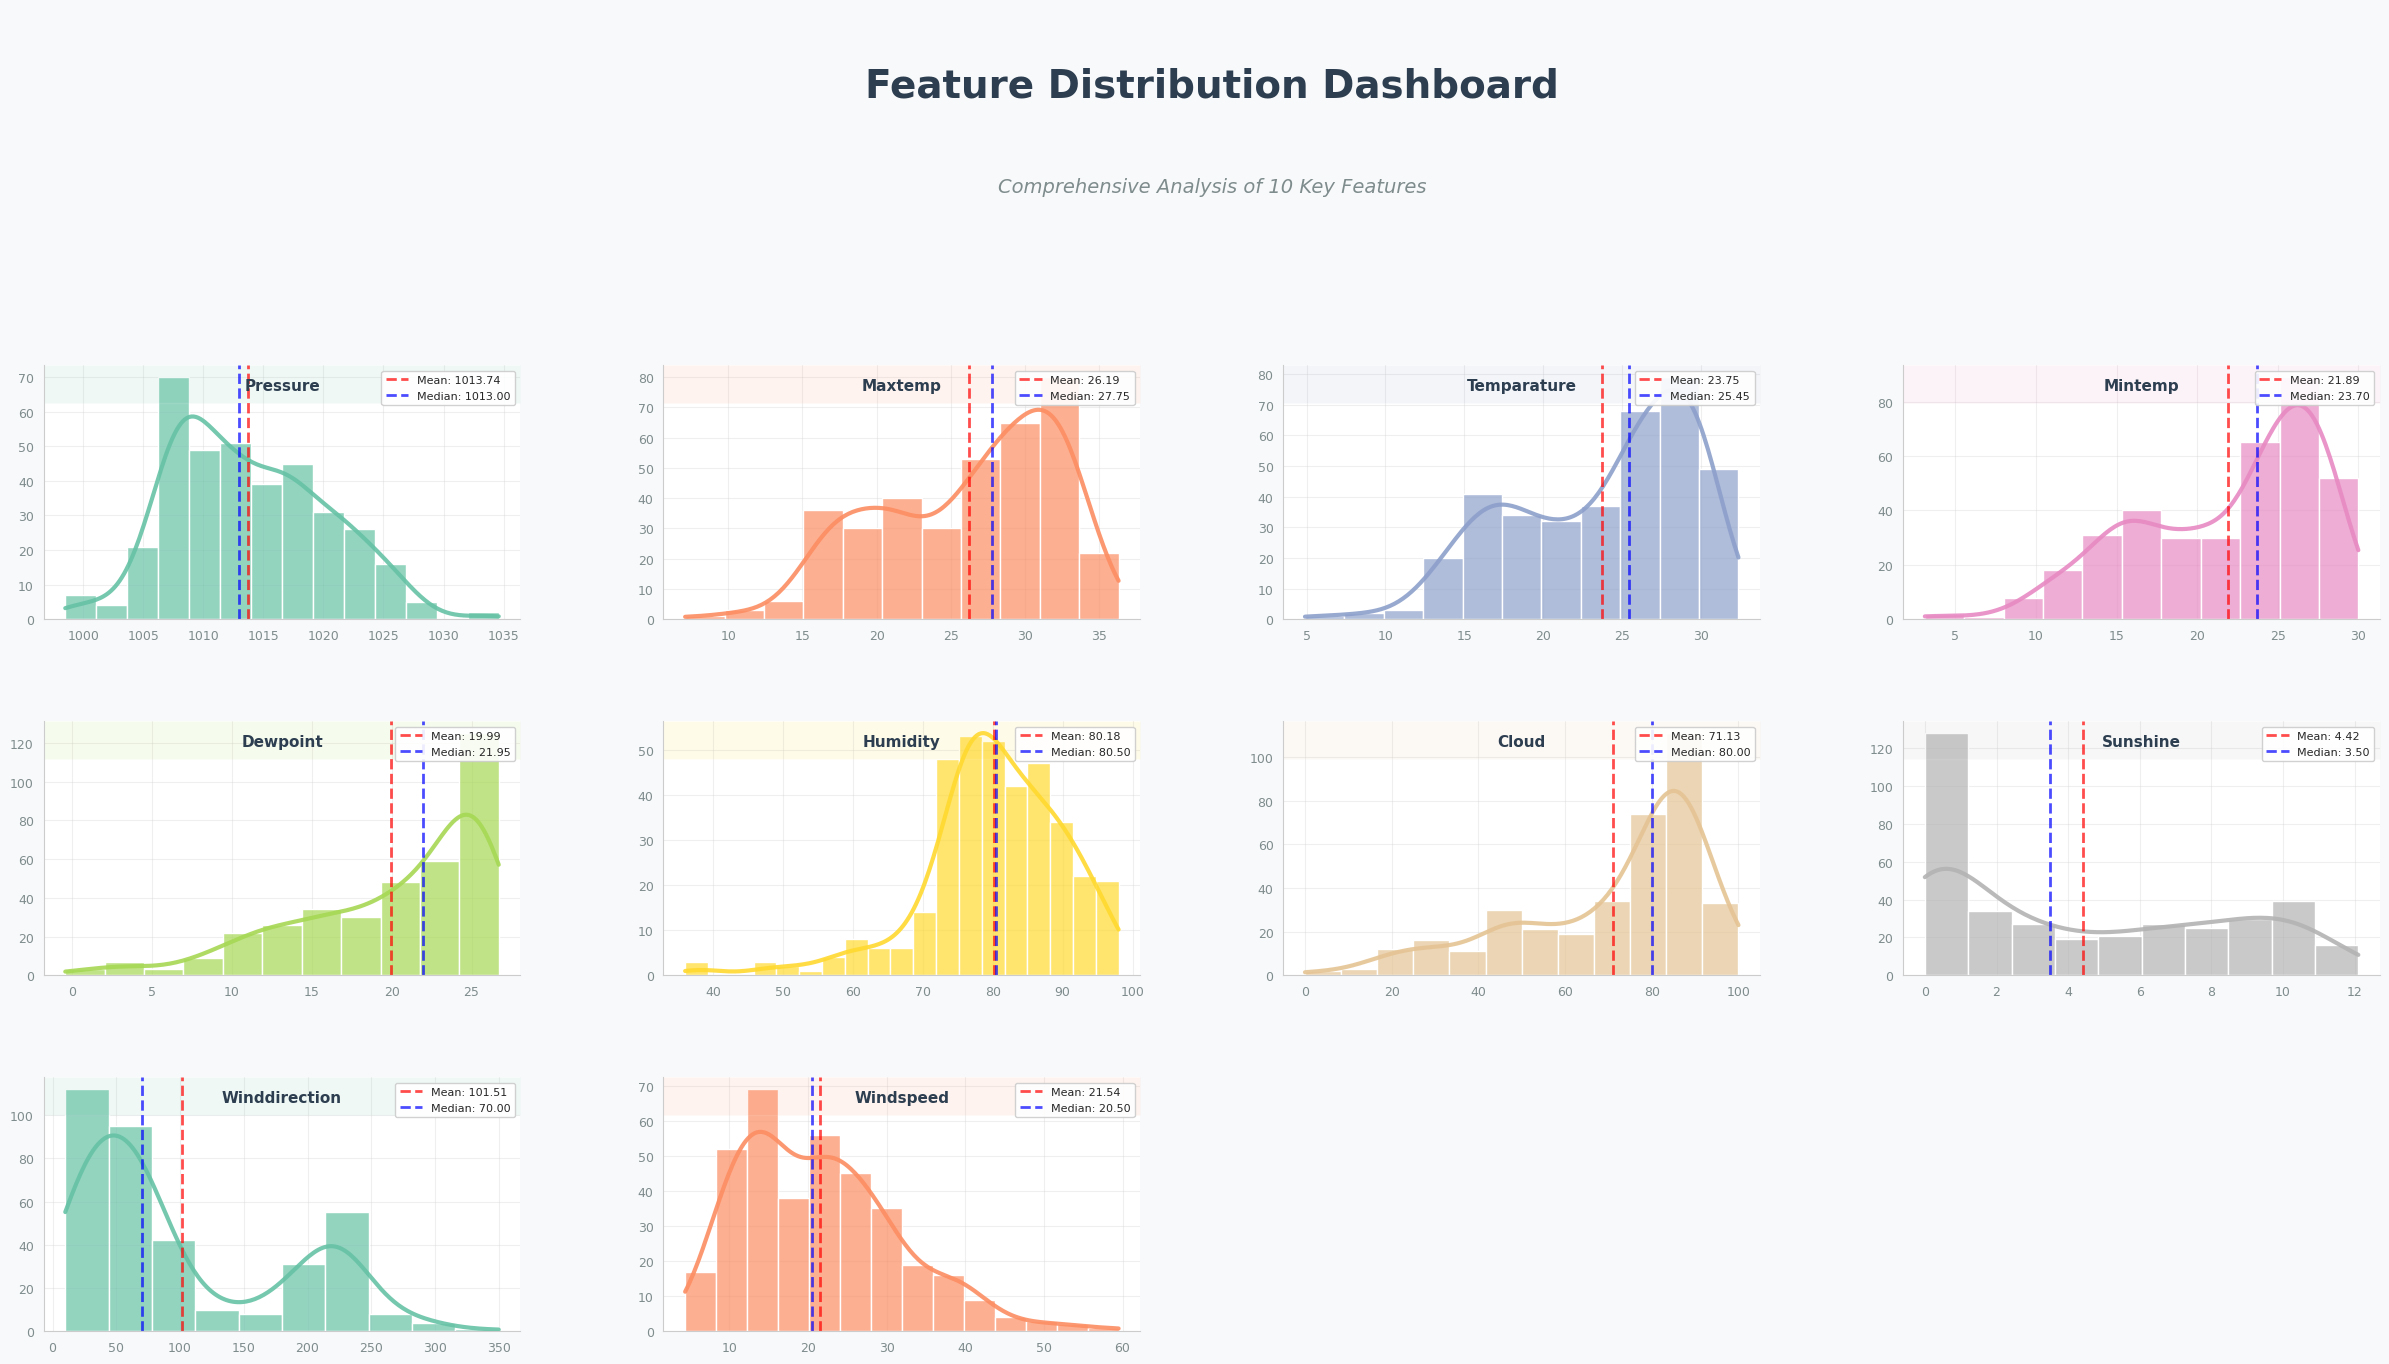

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Set professional style
plt.style.use('default')
sns.set_style("whitegrid")

# Create figure with dashboard layout
fig = plt.figure(figsize=(24, 16))
fig.patch.set_facecolor('#F8F9FA')

# Create main title area
title_ax = plt.subplot2grid((4, 4), (0, 0), colspan=4, rowspan=1)
title_ax.text(0.5, 0.7, 'Feature Distribution Dashboard',
              ha='center', va='center',
              fontsize=28, fontweight='bold',
              color='#2C3E50', transform=title_ax.transAxes)
title_ax.text(0.5, 0.3, f'Comprehensive Analysis of {len(features)} Key Features',
              ha='center', va='center',
              fontsize=14, style='italic',
              color='#7F8C8D', transform=title_ax.transAxes)
title_ax.axis('off')

# Modern color palette
colors = sns.color_palette("Set2", len(features))

# Create distribution plots
positions = [(1, 0), (1, 1), (1, 2), (1, 3),
             (2, 0), (2, 1), (2, 2), (2, 3),
             (3, 0), (3, 1), (3, 2), (3, 3)]

for i, col in enumerate(features[:12]):  # Limit to 12 features
    if i < len(positions):
        row, col_pos = positions[i]
        ax = plt.subplot2grid((4, 4), (row, col_pos))

        # Create enhanced distribution plot
        sns.histplot(data=df, x=col,
                    kde=True,
                    ax=ax,
                    color=colors[i % len(colors)],
                    alpha=0.7,
                    edgecolor='white',
                    linewidth=1)

        # Add trend line for better insight
        kde_line = ax.lines[0] if ax.lines else None
        if kde_line:
            kde_line.set_linewidth(3)
            kde_line.set_alpha(0.9)

        # Professional title with background
        title_bg = Rectangle((0, 0.85), 1, 0.15,
                           transform=ax.transAxes,
                           facecolor=colors[i % len(colors)],
                           alpha=0.1,
                           clip_on=False)
        ax.add_patch(title_bg)

        ax.text(0.5, 0.92, col.replace('_', ' ').title(),
                ha='center', va='center',
                transform=ax.transAxes,
                fontsize=11, fontweight='bold',
                color='#2C3E50')

        # Add key statistics
        mean_val = df[col].mean()
        median_val = df[col].median()

        # Add vertical lines for mean and median
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='blue', linestyle='--', alpha=0.7, linewidth=2, label=f'Median: {median_val:.2f}')

        # Clean styling
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(labelsize=9, colors='#7F8C8D')
        ax.grid(True, alpha=0.3)

        # Add subtle legend
        ax.legend(loc='upper right', fontsize=8, framealpha=0.9)

plt.tight_layout()
plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.3)

plt.show()

**Let's draw boxplots for the continuous variable to detect the outliers present in the data.**

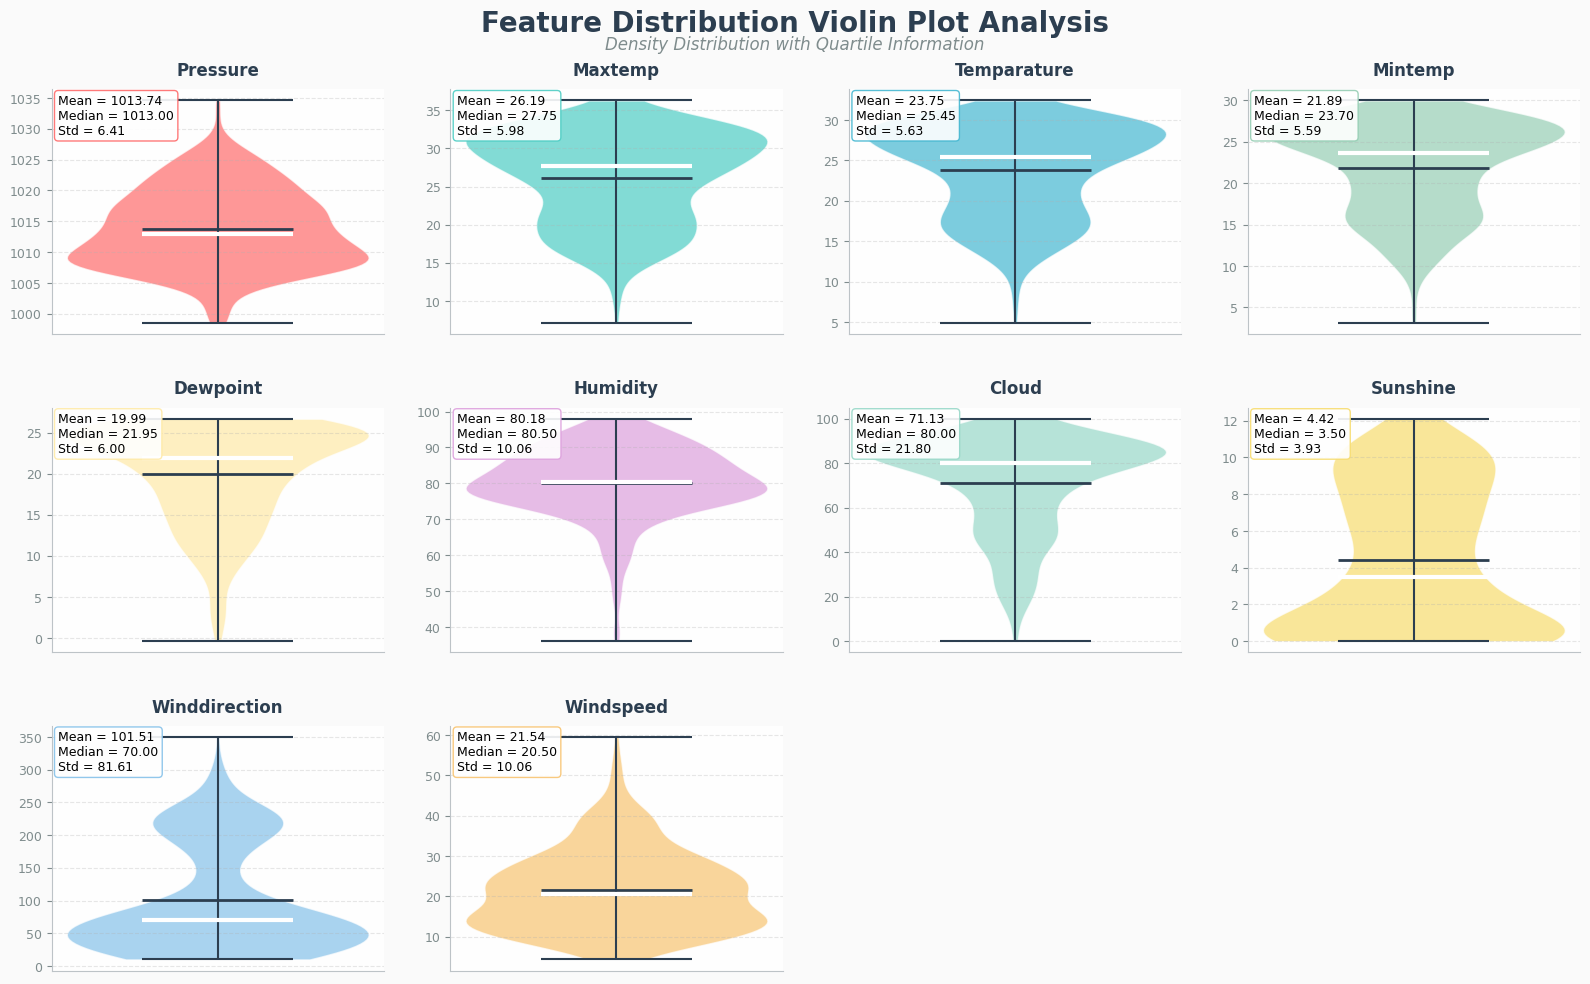

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set modern styling
plt.style.use('default')
sns.set_palette("husl")

# Create figure with enhanced styling
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=4)
fig.suptitle('Feature Distribution Violin Plot Analysis',
             fontsize=20,
             fontweight='bold',
             y=0.98,
             color='#2C3E50')

# Add subtitle
fig.text(0.5, 0.94, 'Density Distribution with Quartile Information',
         ha='center', fontsize=12, style='italic', color='#7F8C8D')

# Set background color
fig.patch.set_facecolor('#FAFAFA')

# Modern color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4',
          '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F',
          '#85C1E9', '#F8C471', '#82E0AA', '#D7BDE2']

# Flatten axes for easy iteration
axes_flat = axes.flatten()

for i, col in enumerate(features):
    ax = axes_flat[i]

    # Create beautiful violin plot
    violin_parts = ax.violinplot(df[col].dropna(), positions=[0],
                                widths=0.8, showmeans=True, showmedians=True)

    # Customize violin appearance
    for pc in violin_parts['bodies']:
        pc.set_facecolor(colors[i % len(colors)])
        pc.set_alpha(0.7)
        pc.set_edgecolor('white')
        pc.set_linewidth(1)

    # Customize other elements
    violin_parts['cmeans'].set_color('#2C3E50')
    violin_parts['cmeans'].set_linewidth(2)
    violin_parts['cmedians'].set_color('white')
    violin_parts['cmedians'].set_linewidth(3)
    violin_parts['cbars'].set_color('#2C3E50')
    violin_parts['cmins'].set_color('#2C3E50')
    violin_parts['cmaxes'].set_color('#2C3E50')

    # Customize each subplot
    ax.set_title(f'{col.title().replace("_", " ")}',
                fontsize=12,
                fontweight='bold',
                pad=10,
                color='#2C3E50')

    ax.set_xlabel('')
    ax.set_ylabel('')

    # Calculate statistics
    data_clean = df[col].dropna()
    mean_val = data_clean.mean()
    median_val = data_clean.median()
    std_val = data_clean.std()

    # Create statistics text
    stats_text = f'Mean = {mean_val:.2f}\nMedian = {median_val:.2f}\nStd = {std_val:.2f}'

    # Position statistics text box
    ax.text(0.02, 0.98, stats_text,
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor='white',
                     alpha=0.9,
                     edgecolor=colors[i % len(colors)],
                     linewidth=1))

    # Style the axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    ax.tick_params(colors='#7F8C8D', labelsize=9)
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    ax.set_facecolor('#FEFEFE')

    # Remove x-axis ticks
    ax.set_xticks([])

# Hide empty subplots if features < 12
for j in range(len(features), len(axes_flat)):
    axes_flat[j].set_visible(False)

# Adjust layout with better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.3, wspace=0.2)

plt.show()

There are outliers in the data but sadly we do not have much data so, we cannot remove this.

In [23]:
df.replace({'yes':1, 'no':0}, inplace=True)

Sometimes there are highly correlated features that just increase the dimensionality of the feature space and do not good for the model's performance. So we must check whether there are highly correlated features in this dataset or not.

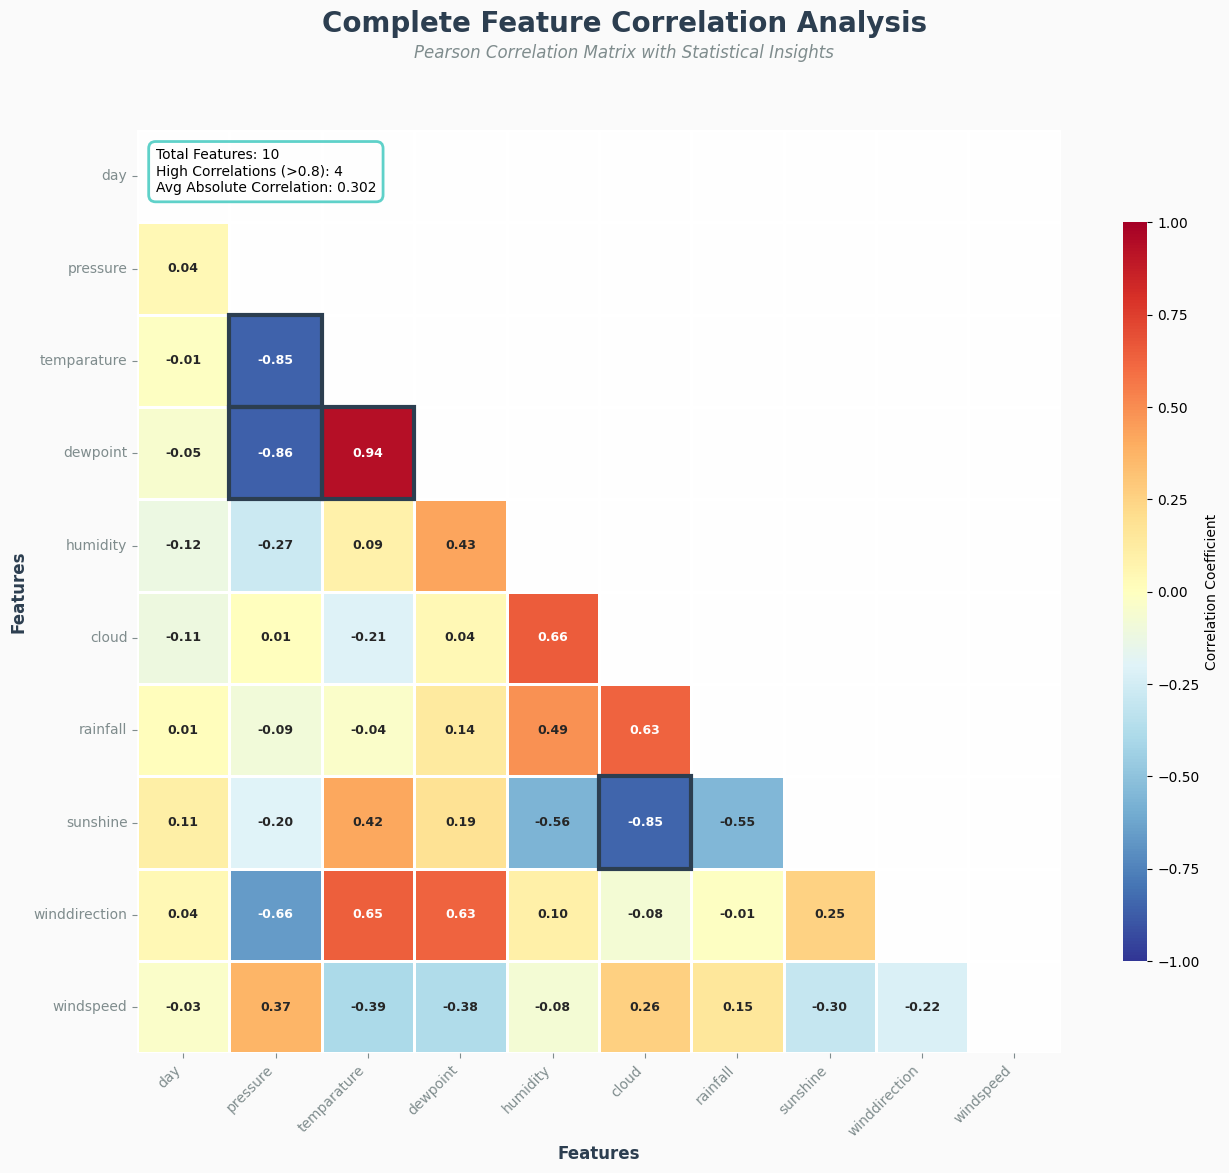

🔍 Correlation Analysis Summary:
📈 High Correlation Pairs (>0.8):
  • temparature ↔ dewpoint: 0.937 (Strong Positive)
  • pressure ↔ dewpoint: -0.860 (Strong Negative)
  • pressure ↔ temparature: -0.852 (Strong Negative)
  • cloud ↔ sunshine: -0.848 (Strong Negative)

Overall Statistics:
  • Average absolute correlation: 0.302
  • Maximum correlation: 0.937
  • Minimum correlation: -0.860


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================================================
# VERSION 2: COMPLETE CORRELATION MATRIX WITH MODERN STYLING
# =============================================================================

# Set modern styling
plt.style.use('default')
sns.set_palette("husl")

# Create figure with enhanced styling
fig, ax = plt.subplots(figsize=(14, 12))
fig.suptitle('Complete Feature Correlation Analysis',
             fontsize=20,
             fontweight='bold',
             y=0.95,
             color='#2C3E50')

# Add subtitle
fig.text(0.5, 0.91, 'Pearson Correlation Matrix with Statistical Insights',
         ha='center', fontsize=12, style='italic', color='#7F8C8D')

# Set background color
fig.patch.set_facecolor('#FAFAFA')

# Calculate correlation matrix
corr_matrix = df.corr()

# Create mask for upper triangle (optional - cleaner look)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create beautiful heatmap with modern colors
sns.heatmap(corr_matrix,
           mask=mask,  # Remove this line if you want full matrix
           annot=True,
           fmt='.2f',
           cmap='RdYlBu_r',  # Beautiful red-yellow-blue colormap
           center=0,
           square=True,
           linewidths=0.8,
           linecolor='white',
           cbar_kws={'label': 'Correlation Coefficient',
                    'shrink': 0.8,
                    'aspect': 30},
           annot_kws={'fontsize': 9, 'fontweight': 'bold'},
           vmin=-1, vmax=1,
           ax=ax)

# Highlight high correlations with different text color
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if not mask[i, j]:  # Only for visible cells
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.8 and i != j:
                # Highlight high correlation cells
                ax.add_patch(plt.Rectangle((j, i), 1, 1,
                           fill=False, edgecolor='#2C3E50', lw=3))

# Customize the plot
ax.set_xlabel('Features', fontsize=12, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Features', fontsize=12, fontweight='bold', color='#2C3E50')

# Style the tick labels
ax.tick_params(colors='#7F8C8D', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add background color to the plot area
ax.set_facecolor('#FEFEFE')

# Add statistics box
total_features = len(corr_matrix.columns)
high_corr_count = np.sum(np.abs(corr_matrix.values) > 0.8) - total_features  # Exclude diagonal
avg_corr = np.mean(np.abs(corr_matrix.values[~np.eye(total_features, dtype=bool)]))

stats_text = f'Total Features: {total_features}\nHigh Correlations (>0.8): {high_corr_count//2}\nAvg Absolute Correlation: {avg_corr:.3f}'

ax.text(0.02, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5',
                 facecolor='white',
                 alpha=0.9,
                 edgecolor='#4ECDC4',
                 linewidth=2))

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Print detailed correlation insights
print("🔍 Correlation Analysis Summary:")
print("="*50)

# Find and display high correlations
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i],
                                  corr_matrix.columns[j],
                                  corr_val))

if high_corr_pairs:
    print(f"📈 High Correlation Pairs (>0.8):")
    for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        correlation_type = "Strong Positive" if corr_val > 0 else "Strong Negative"
        print(f"  • {feat1} ↔ {feat2}: {corr_val:.3f} ({correlation_type})")
else:
    print("No highly correlated feature pairs found (all correlations ≤ 0.8)")

print(f"\nOverall Statistics:")
print(f"  • Average absolute correlation: {avg_corr:.3f}")
print(f"  • Maximum correlation: {np.max(np.abs(corr_matrix.values[~np.eye(total_features, dtype=bool)])):.3f}")
print(f"  • Minimum correlation: {np.min(corr_matrix.values[~np.eye(total_features, dtype=bool)]):.3f}")

# Optional: Save high-quality version
# plt.savefig('complete_correlation_matrix.png', dpi=300, bbox_inches='tight',
#             facecolor='#FAFAFA', edgecolor='none')

In [29]:
#
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

## Model Training
Separate the features and target variables and split them into training and testing data by using which will select the model that is performing best on the validation data.

In [30]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [31]:
X_train, X_val, \
    Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [32]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [33]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8893209767430116
Validation Accuracy :  0.8966666666666667

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.8391666666666666

SVC(probability=True) : 
Training Accuracy :  

## Model Evaluation
From the above accuracies, we can say that Logistic Regression and support vector classifier are satisfactory as the gap between the training and the validation accuracy is low. Let's plot the confusion matrix as well for the validation data using the SVC model.




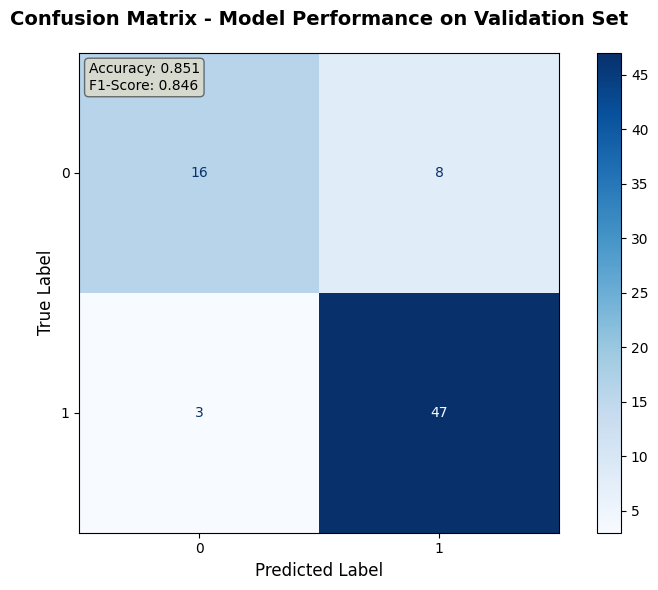


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74



In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn import metrics
import numpy as np

# Set up the plot with better styling
plt.style.use('default')  # or try 'seaborn-v0_8' for a cleaner look
fig, ax = plt.subplots(figsize=(8, 6))

# Create confusion matrix with enhanced display
cm_display = ConfusionMatrixDisplay.from_estimator(
    models[2],
    X_val,
    Y_val,
    ax=ax,
    cmap='Blues',  # Color scheme
    normalize=None,  # Options: None, 'true', 'pred', 'all'
    display_labels=None,  # Add custom labels if needed
    values_format='d'  # Format for numbers (d=integer, .2f=float with 2 decimals)
)

# Customize the plot
plt.title('Confusion Matrix - Model Performance on Validation Set',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Add grid for better readability
ax.grid(False)  # Turn off grid if it interferes with readability

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Optional: Add classification metrics as text
y_pred = models[2].predict(X_val)
accuracy = metrics.accuracy_score(Y_val, y_pred)
f1_score = metrics.f1_score(Y_val, y_pred, average='weighted')

# Add metrics text box
textstr = f'Accuracy: {accuracy:.3f}\nF1-Score: {f1_score:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.show()

# Optional: Print detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(Y_val, y_pred))

# This code is modified by Gul Amiz Ibrahimi

In [35]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74



In [36]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from scipy import stats
# import pandas as pd

# # =============================================================================
# # CONSISTENT STYLING SETUP
# # =============================================================================

# # Modern color palette (same as your favorite)
# colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4',
#           '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F',
#           '#85C1E9', '#F8C471', '#82E0AA', '#D7BDE2']

# def setup_plot_style():
#     """Set consistent modern styling"""
#     plt.style.use('default')
#     sns.set_palette("husl")

# def style_axes(ax, color='#BDC3C7'):
#     """Apply consistent axis styling"""
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_color(color)
#     ax.spines['bottom'].set_color(color)
#     ax.tick_params(colors='#7F8C8D', labelsize=10)
#     ax.grid(True, alpha=0.3, linestyle='--')
#     ax.set_facecolor('#FEFEFE')

# # =============================================================================
# # 1. CORRELATION HEATMAP
# # =============================================================================

# def beautiful_correlation_heatmap(df, features):
#     setup_plot_style()

#     fig, ax = plt.subplots(figsize=(12, 10))
#     fig.suptitle('Feature Correlation Analysis',
#                  fontsize=20, fontweight='bold', y=0.95, color='#2C3E50')
#     fig.text(0.5, 0.91, 'Pearson Correlation Matrix with Statistical Significance',
#              ha='center', fontsize=12, style='italic', color='#7F8C8D')
#     fig.patch.set_facecolor('#FAFAFA')

#     # Create correlation matrix
#     corr_matrix = df[features].corr()

#     # Create mask for upper triangle
#     mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#     # Generate heatmap
#     sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
#                 square=True, linewidths=0.5, cbar_kws={"shrink": .8},
#                 fmt='.2f', annot_kws={'fontsize': 9})

#     ax.set_title('')
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.85)
#     plt.show()

# # =============================================================================
# # 2. BOX PLOTS
# # =============================================================================

# def beautiful_box_plots(df, features, target_col=None):
#     setup_plot_style()

#     n_features = len(features)
#     n_cols = 4
#     n_rows = (n_features + n_cols - 1) // n_cols

#     fig, axes = plt.subplots(figsize=(16, 4 * n_rows), nrows=n_rows, ncols=n_cols)
#     fig.suptitle('Feature Distribution Box Plots',
#                  fontsize=20, fontweight='bold', y=0.95, color='#2C3E50')
#     fig.text(0.5, 0.92, 'Outlier Detection and Quartile Analysis',
#              ha='center', fontsize=12, style='italic', color='#7F8C8D')
#     fig.patch.set_facecolor('#FAFAFA')

#     axes_flat = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

#     for i, col in enumerate(features):
#         ax = axes_flat[i]

#         # Create box plot
#         box_parts = ax.boxplot(df[col].dropna(), patch_artist=True,
#                               boxprops=dict(facecolor=colors[i % len(colors)], alpha=0.7),
#                               medianprops=dict(color='#2C3E50', linewidth=2),
#                               whiskerprops=dict(color='#2C3E50'),
#                               capprops=dict(color='#2C3E50'))

#         ax.set_title(f'{col.title().replace("_", " ")}',
#                     fontsize=12, fontweight='bold', pad=10, color='#2C3E50')

#         # Add statistics
#         q1, median, q3 = np.percentile(df[col].dropna(), [25, 50, 75])
#         iqr = q3 - q1
#         outliers = len(df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)])

#         stats_text = f'Q1 = {q1:.2f}\nQ3 = {q3:.2f}\nOutliers: {outliers}'
#         ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
#                 fontsize=9, verticalalignment='top',
#                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
#                          alpha=0.8, edgecolor=colors[i % len(colors)]))

#         style_axes(ax)
#         ax.set_ylabel('')

#     # Hide empty subplots
#     for j in range(len(features), len(axes_flat)):
#         axes_flat[j].set_visible(False)

#     plt.tight_layout()
#     plt.subplots_adjust(top=0.85)
#     plt.show()

# # =============================================================================
# # 3. SCATTER PLOT MATRIX
# # =============================================================================

# def beautiful_scatter_matrix(df, features):
#     setup_plot_style()

#     # Select subset of features for readability (max 6)
#     selected_features = features[:6] if len(features) > 6 else features

#     fig, axes = plt.subplots(figsize=(15, 15),
#                            nrows=len(selected_features),
#                            ncols=len(selected_features))
#     fig.suptitle('Feature Relationship Matrix',
#                  fontsize=20, fontweight='bold', y=0.95, color='#2C3E50')
#     fig.text(0.5, 0.92, 'Pairwise Scatter Plot Analysis',
#              ha='center', fontsize=12, style='italic', color='#7F8C8D')
#     fig.patch.set_facecolor('#FAFAFA')

#     for i, feat1 in enumerate(selected_features):
#         for j, feat2 in enumerate(selected_features):
#             ax = axes[i, j]

#             if i == j:
#                 # Diagonal: distribution plot
#                 sns.histplot(data=df, x=feat1, kde=True, ax=ax,
#                            color=colors[i % len(colors)], alpha=0.7)
#             else:
#                 # Off-diagonal: scatter plot
#                 ax.scatter(df[feat2], df[feat1],
#                           color=colors[(i+j) % len(colors)],
#                           alpha=0.6, s=20)

#                 # Add correlation coefficient
#                 corr_coef = df[feat1].corr(df[feat2])
#                 ax.text(0.05, 0.95, f'r = {corr_coef:.3f}',
#                        transform=ax.transAxes,
#                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

#             # Labels only on edges
#             if i == len(selected_features) - 1:
#                 ax.set_xlabel(feat2.replace('_', ' ').title(), fontsize=10)
#             else:
#                 ax.set_xlabel('')

#             if j == 0:
#                 ax.set_ylabel(feat1.replace('_', ' ').title(), fontsize=10)
#             else:
#                 ax.set_ylabel('')

#             style_axes(ax)

#     plt.tight_layout()
#     plt.subplots_adjust(top=0.88)
#     plt.show()

# # =============================================================================
# # 4. FEATURE IMPORTANCE PLOT
# # =============================================================================

# def beautiful_feature_importance(feature_names, importance_scores, title="Feature Importance"):
#     setup_plot_style()

#     fig, ax = plt.subplots(figsize=(12, 8))
#     fig.suptitle(f'{title} Analysis',
#                  fontsize=20, fontweight='bold', y=0.95, color='#2C3E50')
#     fig.text(0.5, 0.91, 'Ranked Feature Contribution to Model Performance',
#              ha='center', fontsize=12, style='italic', color='#7F8C8D')
#     fig.patch.set_facecolor('#FAFAFA')

#     # Sort features by importance
#     sorted_idx = np.argsort(importance_scores)
#     sorted_features = [feature_names[i] for i in sorted_idx]
#     sorted_scores = [importance_scores[i] for i in sorted_idx]

#     # Create horizontal bar plot
#     bars = ax.barh(range(len(sorted_features)), sorted_scores,
#                    color=[colors[i % len(colors)] for i in range(len(sorted_features))],
#                    alpha=0.8, edgecolor='white', linewidth=1)

#     # Customize
#     ax.set_yticks(range(len(sorted_features)))
#     ax.set_yticklabels([feat.replace('_', ' ').title() for feat in sorted_features])
#     ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')

#     # Add value labels on bars
#     for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
#         ax.text(score + 0.001, bar.get_y() + bar.get_height()/2,
#                 f'{score:.3f}', ha='left', va='center', fontsize=9)

#     style_axes(ax)
#     ax.spines['left'].set_visible(True)

#     plt.tight_layout()
#     plt.subplots_adjust(top=0.85)
#     plt.show()

# # =============================================================================
# # USAGE EXAMPLES
# # =============================================================================

# # Example usage (uncomment to use):
# # beautiful_correlation_heatmap(df, features)
# # beautiful_box_plots(df, features)
# # beautiful_scatter_matrix(df, features)
# # beautiful_feature_importance(features, np.random.rand(len(features)), "Random Forest")

# print("🎨 Beautiful plot templates ready!")
# print("Available functions:")
# print("- beautiful_correlation_heatmap(df, features)")
# print("- beautiful_box_plots(df, features)")
# print("- beautiful_scatter_matrix(df, features)")
# print("- beautiful_feature_importance(feature_names, scores, title)")